In [2]:
import requests
import os
import json
import pandas as pd

In [3]:
# To set your environment variables in your terminal run the following line:
# export 'BEARER_TOKEN'='<your_bearer_token>'
with open('credentials.json', 'r') as json_file:
    cred = json.load(json_file)
bearer_token = cred["BEARER_TOKEN"]

In [23]:
search_url = "https://api.twitter.com/2/tweets/counts/recent"

# Optional params: start_time,end_time,since_id,until_id,next_token,granularity
query_params = {'query': '#climate -is:retweet lang:en','granularity': 'hour'}

In [24]:
def bearer_oauth(r):
    """
    Method required by bearer token authentication.
    """

    r.headers["Authorization"] = f"Bearer {bearer_token}"
    r.headers["User-Agent"] = "v2RecentTweetCountsPython"
    return r

In [25]:
def connect_to_endpoint(url, params):
    response = requests.request("GET", search_url, auth=bearer_oauth, params=params)
    print(response.status_code)
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()

200


<AxesSubplot:>

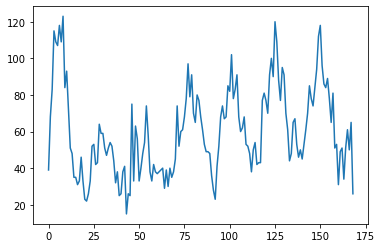

In [26]:
json_response = connect_to_endpoint(search_url, query_params)
counts = pd.DataFrame(json_response['data'])
counts.tweet_count.plot()

In [27]:
counts.to_csv(f"tweet_counts_{min(counts.start)}_{max(counts.start)}.csv", index=False)